<a href="https://colab.research.google.com/github/shanziSZ/5001_Sarcasm_Headlines/blob/main/Bidirectional%20RNN%20with%20LSTM_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import tensorflow as tf
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
df = pd.read_json('/content/drive/MyDrive/5001_Group/Sarcasm_Headlines_Dataset_v2.json', lines=True)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [5]:
headlines = df['headline']
labels = df['is_sarcastic']

In [6]:
from sklearn.model_selection import train_test_split
# training set : validation set : test daset = 8 : 1: 1 
x_train, x_test, y_train, y_test = train_test_split(headlines, labels, test_size=0.2, random_state=100)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=100)

In [7]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(22895,)
(2862,)
(2862,)
(22895,)
(2862,)
(2862,)


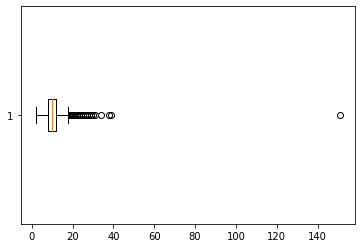

In [8]:
# print(headlines[0])
# print(len(headlines[0].split(" ")))

# the number of words in headlines
import matplotlib.pyplot as plt
len_headline = []
for i in headlines:
  len_headline.append(len(i.split(" ")))
plt.boxplot(len_headline,vert=False)
plt.show()



In [9]:
max_len = max(len_headline)
print(max_len)

151


In [10]:
# Tokenize and pad
vocab_size = 30000 # 10000, update
oov_token = '<00V>'
max_length = 40 # 120, max_len update
padding_type = 'post'
trunc_type = 'post'
embedding_dim = 60 # 16,30, update
num_epochs = 10

#Tokenize and Pad
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index

x_train = tokenizer.texts_to_sequences(x_train)
train_padded = pad_sequences(x_train, maxlen=max_length, padding=padding_type, truncating=trunc_type)

x_val = tokenizer.texts_to_sequences(x_val)
val_padded = pad_sequences(x_val, maxlen=max_length, padding=padding_type, truncating=trunc_type)

x_test = tokenizer.texts_to_sequences(x_test)
test_padded = pad_sequences(x_test, maxlen=max_length, padding=padding_type, truncating=trunc_type)

#LSTM
model_lstm = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_lstm.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model_lstm.summary()
history_lstm = model_lstm.fit(train_padded, 
                    y_train, 
                    validation_data=(val_padded, y_val), 
                    epochs=num_epochs, 
                    verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 60)            1800000   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               23808     
 l)                                                              
                                                                 
 dense (Dense)               (None, 24)                1560      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,825,393
Trainable params: 1,825,393
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
716/716 - 42s - loss: 0.3854 - accuracy: 0.8180 - val_loss: 0.2894 - val_accuracy: 0.8749 - 42s/epoch

In [11]:
y_predict = model_lstm.predict(test_padded)

In [12]:
import numpy as np
from sklearn.metrics import accuracy_score

y_test.tolist()
y_pred_list = y_predict.reshape(y_predict.shape[0]).tolist()

# get the predicted label 
y_pred_label = [0]*y_predict.shape[0]
for i in range(len(y_predict)):
    y_pred_label[i] = round(y_pred_list[i])

y_true = y_test
accuracy_score(y_true, y_pred_label)


0.8438155136268344